<a href="https://colab.research.google.com/github/Ingridloppess/Febre-amarela-no-Brasil/blob/main/Projetofebre_amarelaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


Irei carregar a planilha especificando um delimitador e depois exibir as colunas e as primeiras linhas para verificar os dados.

In [ ]:

df = pd.read_csv('/content/casos_94_23.csv', encoding='ISO-8859-1', delimiter=';')

df.head()



,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO,DT_OBITO
0,1,N,14,RR,140005.0,ALTO ALEGRE,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM,01/12/1994
1,2,N,14,RR,140045.0,PACARAIMA,M,19,19/02/1995,8.0,2.0,1995,1994/1995,NÃO,NaN
2,3,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,32,01/04/1995,13.0,4.0,1995,1994/1995,IGN,NaN
3,4,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,33,03/04/1995,14.0,4.0,1995,1994/1995,SIM,09/04/1995
4,5,N,15,PA,150270.0,CONCEIÇÃO DO ARAGUAIA,M,26,12/04/1995,15.0,4.0,1995,1994/1995,SIM,20/04/1995


Montando o primeiro gráfico, a ideia foi demonstrar o total de casos durante os anos, procurmos alguma forma de deixar o gráfico com uma melhor visulização porém não encontramos, decidimos então seguir em frente.

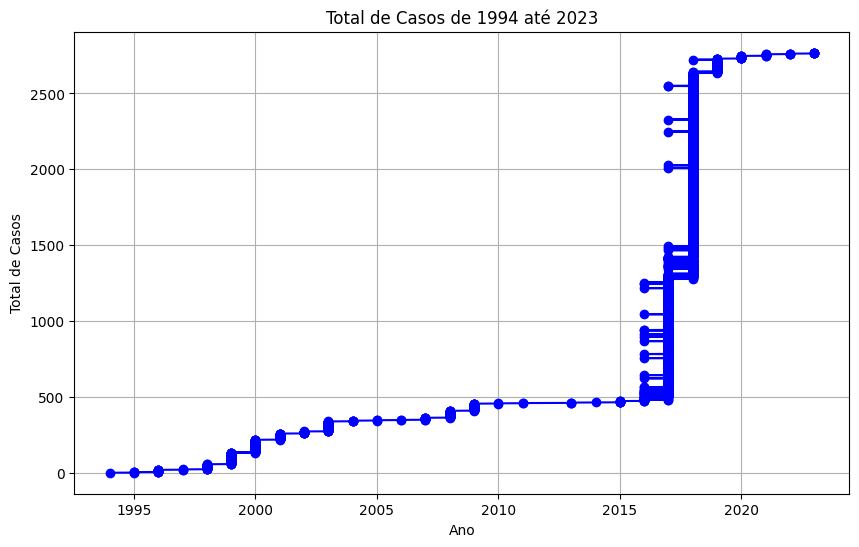

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(df['ANO_IS'], df['ID'], marker='o', linestyle='-', color='b')

plt.title('Total de Casos de 1994 até 2023')
plt.xlabel('Ano')
plt.ylabel('Total de Casos')

plt.grid(True)
plt.show()


Analisando melhor o arquivo csv verificamos que a planilha com tinha o sexo dos casos e decidimos montar um gráfico que demonstrasse os casos baseados nisso, definindo "F" como feminino e "M" como masculino. A proporção exibida pelas fatias do gráfico mostra se a febre amarela afetou mais homens ou mulheres.

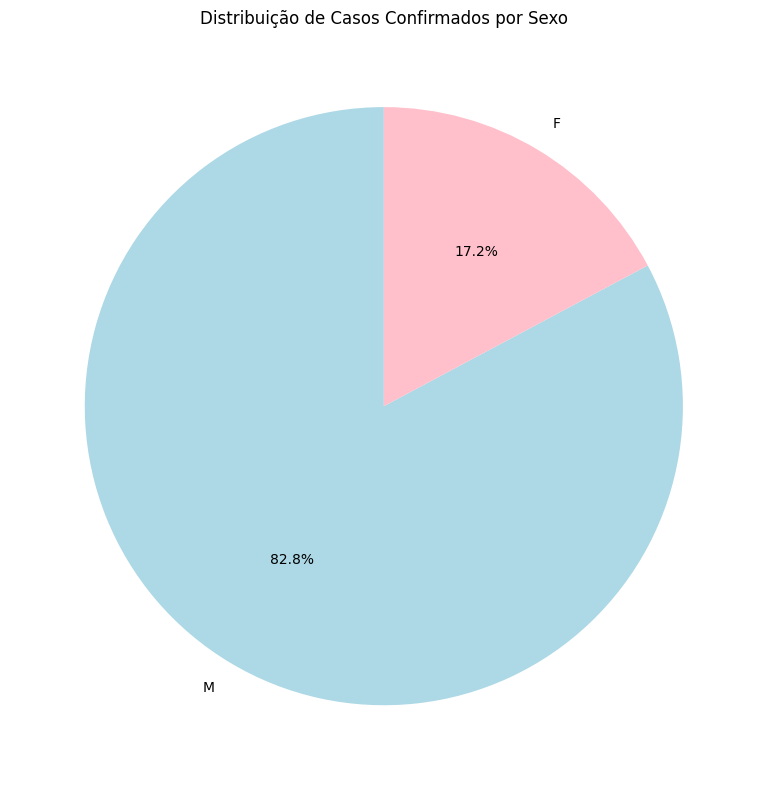

In [ ]:

df['SEXO'] = df['SEXO'].str.strip()


casos_por_sexo = df['SEXO'].value_counts()

# gráfico de pizza
plt.figure(figsize=(8,8))
casos_por_sexo.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Distribuição de Casos Confirmados por Sexo')
plt.ylabel('')
plt.tight_layout()
plt.show()


Após algumas aulas e pesquisas encontramos uma melhor forma de visualização.
Anos com barras mais altas tiveram mais casos de febre amarela confirmados. Se houver picos em determinados anos, isso pode indicar surtos da doença. Por outro lado, anos com barras menores ou ausência de barras indicam períodos com poucos ou nenhum caso confirmado.

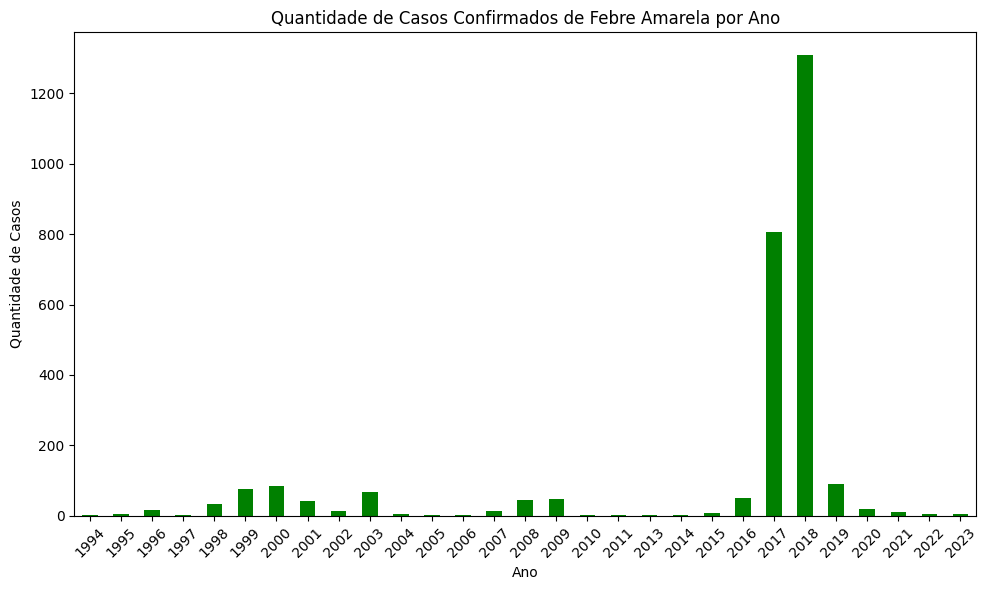

In [ ]:



df.columns = df.columns.str.strip()


df['ANO_IS'] = pd.to_numeric(df['ANO_IS'], errors='coerce')

casos_por_ano = df['ANO_IS'].value_counts().sort_index()

plt.figure(figsize=(10,6))
casos_por_ano.plot(kind='bar', color='green')
plt.title('Quantidade de Casos Confirmados de Febre Amarela por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Picos em determinadas faixas etárias indicam que mais pessoas dessa idade contraíram febre amarela. Por exemplo, se o histograma mostrar um pico em torno dos 30 a 40 anos, significa que pessoas nessa faixa etária foram mais afetadas.

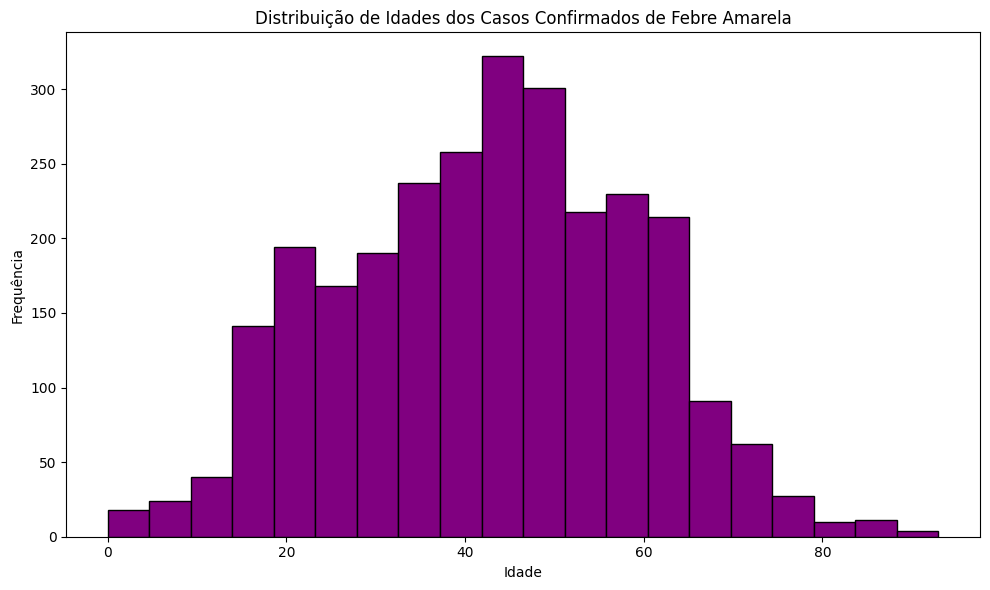

In [ ]:

df['IDADE'] = pd.to_numeric(df['IDADE'], errors='coerce')


plt.figure(figsize=(10,6))
plt.hist(df['IDADE'].dropna(), bins=20, color='purple', edgecolor='black')
plt.title('Distribuição de Idades dos Casos Confirmados de Febre Amarela')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


Um aumento ou pico em certas partes do gráfico indica que houve um surto de febre amarela naquele período.

<ipython-input-14-2a19f883ff6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['DATA'] = pd.to_datetime(df_valid['ANO_IS'].astype(int).astype(str) + '-' + df_valid['MES_IS'].astype(int).astype(str), errors='coerce')


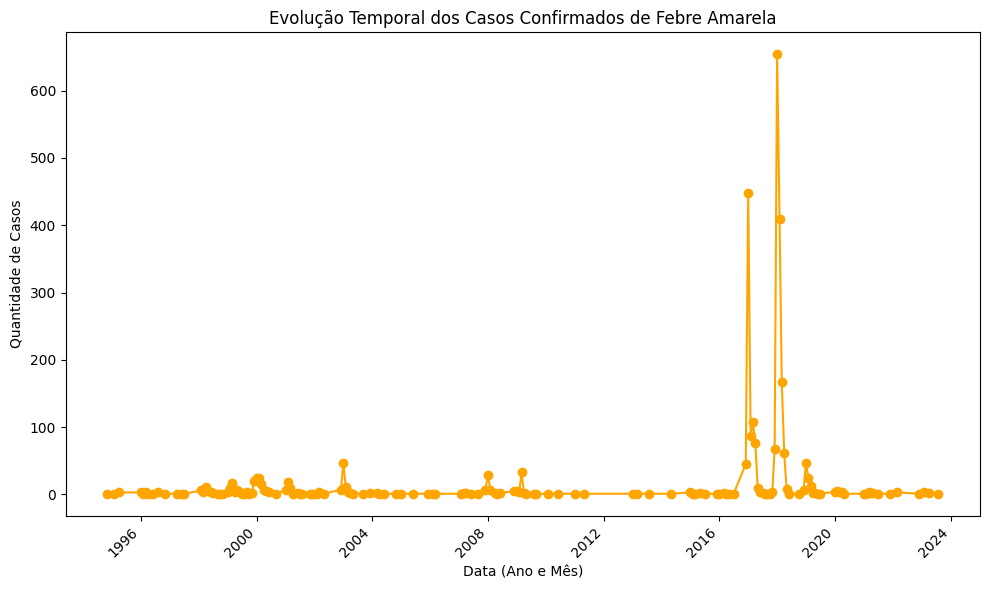

In [ ]:

df['MES_IS'] = pd.to_numeric(df['MES_IS'], errors='coerce', downcast='integer')
df['ANO_IS'] = pd.to_numeric(df['ANO_IS'], errors='coerce', downcast='integer')

df_valid = df.dropna(subset=['ANO_IS', 'MES_IS'])

df_valid['DATA'] = pd.to_datetime(df_valid['ANO_IS'].astype(int).astype(str) + '-' + df_valid['MES_IS'].astype(int).astype(str), errors='coerce')

casos_por_data = df_valid['DATA'].value_counts().sort_index()

plt.figure(figsize=(10,6))
casos_por_data.plot(kind='line', color='orange', marker='o')
plt.title('Evolução Temporal dos Casos Confirmados de Febre Amarela')
plt.xlabel('Data (Ano e Mês)')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Esse gráfico de barras empilhadas mostra a distribuição de óbitos e sobreviventes por estado, com base nos casos confirmados de febre amarela. As barras representam os estados, e cada uma é dividida em seções empilhadas que indicam o número de casos que resultaram em óbito e o número de casos onde o paciente sobreviveu.

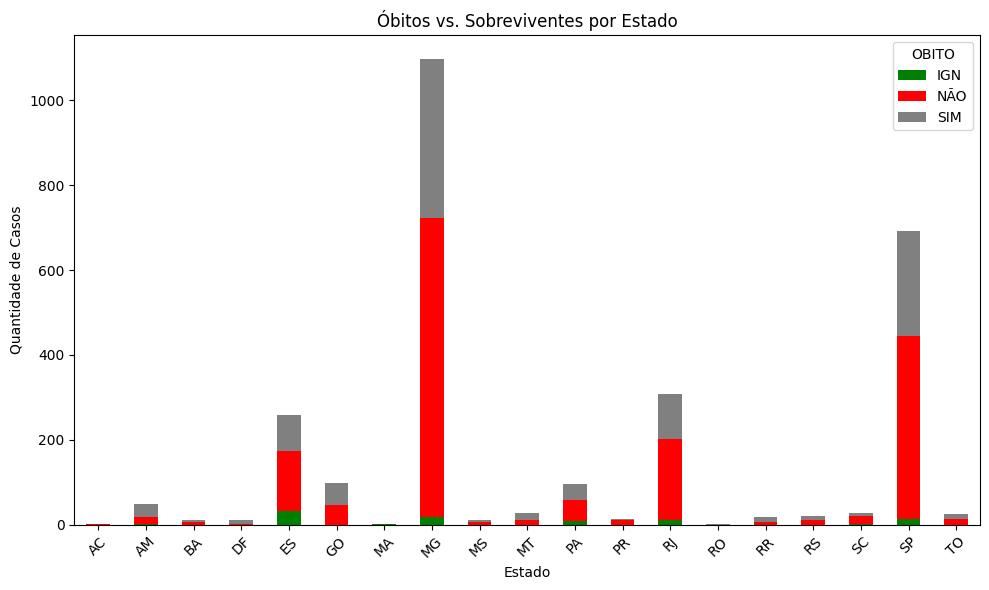

In [ ]:

casos_por_estado_obito = df.groupby(['UF_LPI', 'OBITO']).size().unstack(fill_value=0)


casos_por_estado_obito.plot(kind='bar', stacked=True, figsize=(10,6), color=['green', 'red', 'gray'])
plt.title('Óbitos vs. Sobreviventes por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Este gráfico de boxplot exibe a distribuição das idades dos pacientes com casos confirmados de febre amarela, separando os dados por sexo (masculino e feminino).

<ipython-input-8-d64d7c8ac367>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SEXO', y='IDADE', data=df, palette='Set2')


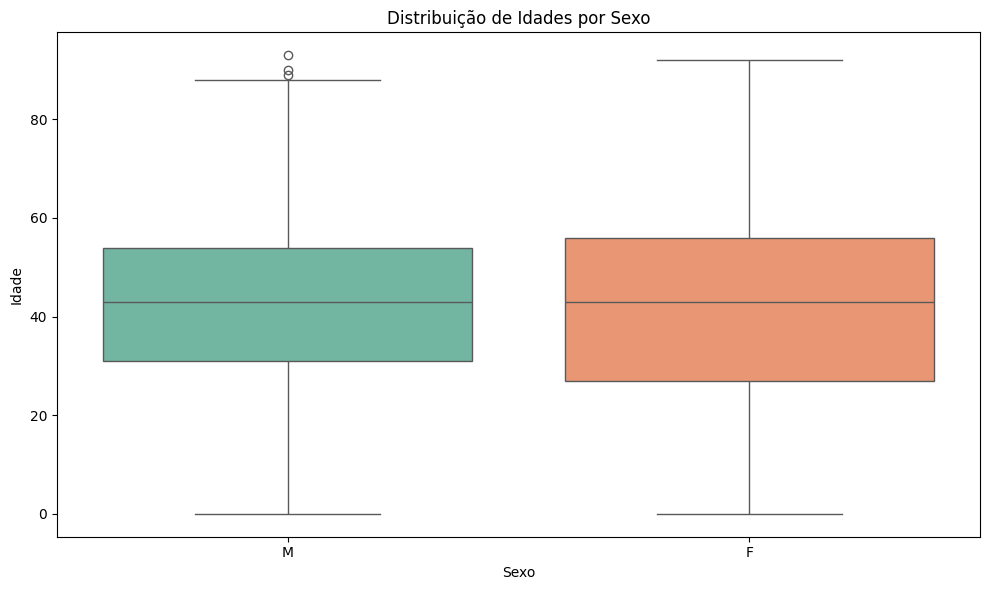

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df['IDADE'] = pd.to_numeric(df['IDADE'], errors='coerce')
df['SEXO'] = df['SEXO'].str.strip()

plt.figure(figsize=(10,6))
sns.boxplot(x='SEXO', y='IDADE', data=df, palette='Set2')
plt.title('Distribuição de Idades por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()


Esse gráfico de barras empilhadas mostra o número total de casos confirmados de febre amarela em cada estado ao longo dos anos. Cada barra representa um estado, com diferentes cores dentro da barra indicando os casos ocorridos em diferentes anos.



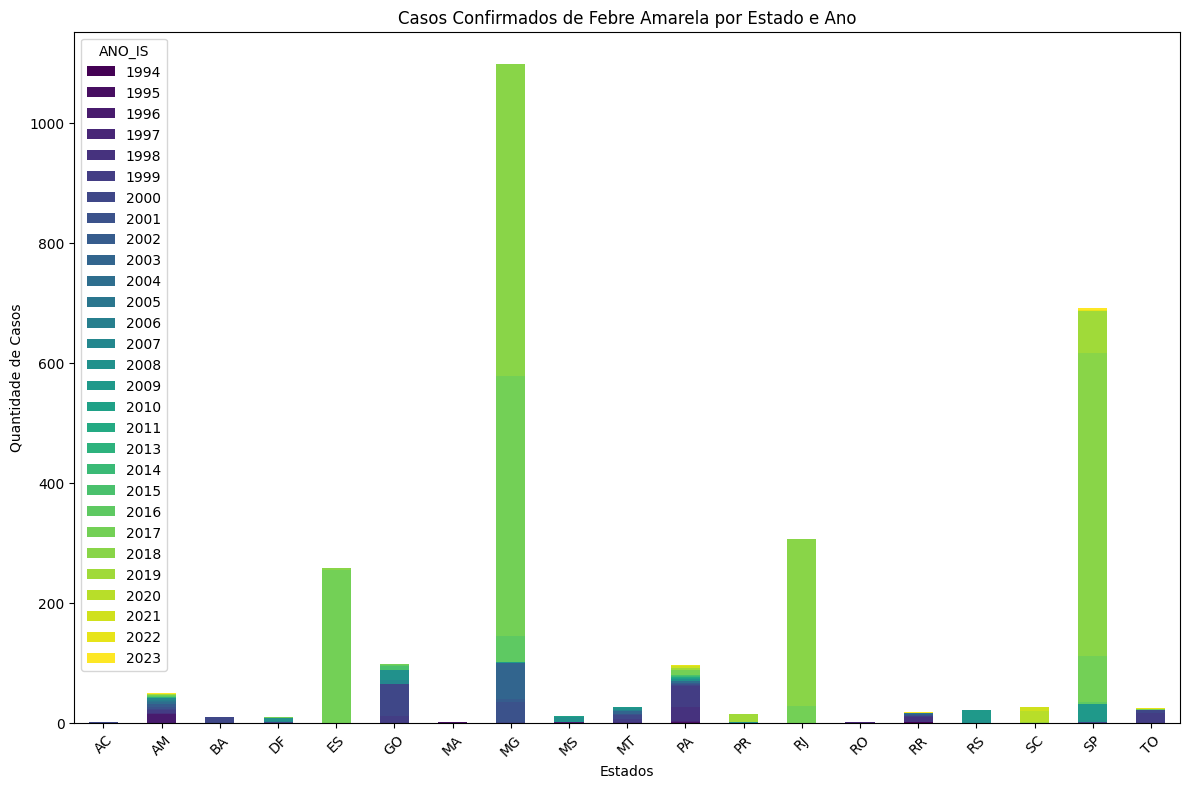

In [ ]:
casos_estado_ano = df.groupby(['UF_LPI', 'ANO_IS']).size().unstack(fill_value=0)

casos_estado_ano.plot(kind='bar', stacked=True, figsize=(12,8), colormap='viridis')
plt.title('Casos Confirmados de Febre Amarela por Estado e Ano')
plt.xlabel('Estados')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
